### Problem Statement 

Implement dynamic pricing strategies for fitness classes based on demand, time, and location

- cult.fit (formerly cure.fit or Curefit) is a health and fitness company offering digital and offline experiences across fitness, nutrition, and mental well-being. With the aim to make fitness fun and easy, cult.
- Demand Forecasting , predicting number of bookees

###### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###### Load Prepared Data

In [3]:
data = pd.read_excel('Data1_Cult_fit_Lakshmi.xlsx')

In [4]:
data

,Unnamed: 0,ActivitySiteID,BookingEndDateTime,BookingStartTime,MaxBookees,Number_Booked,Price,BookingEndMonth,BookingEndDay,Booking_Start_Hour,Booking_Start_Min,Activity,Activity_Time,Activity_Duration
0,0,BRP,2018-04-01,09:00:00,35,29,1499,4,1,9,0,BodyCombat,09:00AM - 10:00AM,60
1,1,BRP,2018-04-01,10:00:00,20,15,1999,4,1,10,0,HattonABC,10:00AM - 11:00AM,60
2,2,HXP,2018-04-01,10:00:00,27,20,1999,4,1,10,0,StudioCyc,10:00AM - 11:00AM,60
3,3,HXP,2018-04-01,09:05:00,27,27,1999,4,1,9,5,StudioCyc,09:05AM - 10:05AM,60
4,4,TSC,2018-04-01,10:00:00,30,13,1299,4,1,10,0,BodyConditioning,10:00AM - 11:00AM,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,3266,BRP,2018-06-30,09:00:00,35,21,1999,6,30,9,0,BodyAttack,09:00AM - 10:00AM,60
3267,3267,TSC,2018-06-30,08:30:00,24,11,2999,6,30,8,30,BarrePilates,08:30AM - 09:30AM,60
3268,3268,NBL,2018-06-30,12:00:00,60,9,2999,6,30,12,0,BarrePilates,12:00PM - 01:00PM,60
3269,3269,SBP,2018-06-30,08:30:00,20,6,3999,6,30,8,30,MMACond,08:30AM - 09:30AM,60


In [5]:
# drop Unnamed: 0 which is not required 
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

#### Cleaning the data / Pre Processing the data

data.columns

- No cleaning required, all the column names are in readable format

In [12]:
data.nunique()

ActivitySiteID         5
BookingEndDateTime    91
BookingStartTime      61
MaxBookees            20
Number_Booked         55
Price                  9
BookingEndMonth        3
BookingEndDay         31
Booking_Start_Hour    15
Booking_Start_Min     11
Activity              70
Activity_Time         61
Activity_Duration      1
dtype: int64

- All the columns are aligned with the unique values

##### For forecasting the two important columns required are BookingEndDateTime and Number_Booked
- Keeping two columns in a variable for forcasting

In [19]:
df = data[['BookingEndDateTime','Number_Booked']]

In [21]:
file_name = 'Data_Cult_fit_Lakshmi_Forecasting.xlsx'
 
# saving the excel
df.to_excel(file_name)

In [23]:
df1 = pd.read_excel('Data_Cult_fit_Lakshmi_Forecasting.xlsx', parse_dates=['BookingEndDateTime'], index_col='BookingEndDateTime')

In [25]:
df1.head()

,Unnamed: 0,Number_Booked
BookingEndDateTime,,
2018-04-01,0,29
2018-04-01,1,15
2018-04-01,2,20
2018-04-01,3,27
2018-04-01,4,13


In [27]:
# drop Unnamed: 0 which is not required 
df1.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [29]:
df1.shape

(3271, 1)

- The data has 3271 rows and 2 columns

In [31]:
df1.head()

,Number_Booked
BookingEndDateTime,
2018-04-01,29
2018-04-01,15
2018-04-01,20
2018-04-01,27
2018-04-01,13


In [277]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3271 entries, 2018-04-01 to 2018-06-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Number_Booked  3271 non-null   int64
dtypes: int64(1)
memory usage: 51.1 KB


- Data has no null values, and the dtypes are aligned
- There is one column Number_Booked which needs forcasting depending on the time stamp


#### Aggregate the data (sum the bookings for each day)

In [35]:
df2 = df1.resample('D').sum()

# Manually set the frequency
df2.index.freq = 'D'

In [37]:
df2.head()

,Number_Booked
BookingEndDateTime,
2018-04-01,223
2018-04-02,296
2018-04-03,957
2018-04-04,905
2018-04-05,695


In [40]:
# Check the frequency
print("Index frequency:", df2.index.freq)

Index frequency: <Day>


##### Preforming EDA

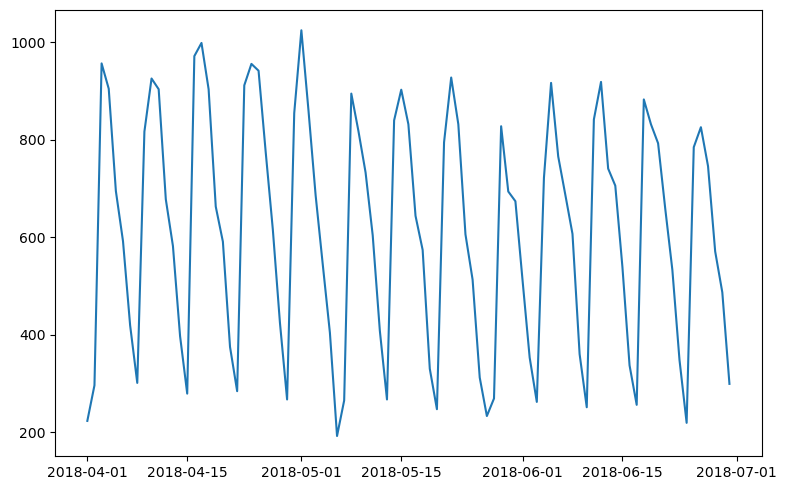

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))#canvas  size
plt.plot(df2)#line plot
plt.tight_layout()


- The plot tells there the same pattern occurance over the time

#### Checking whether the data is Stationary

* Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
* Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

##### That is it needs to have,
* Constant mean
* Constant variance
* Constant covariance between periods of identical distance

**Why do we need Stationarity?**
- Stationary processes are easier to analyze
- Stationarity is assumed by most of the algorithms
- It is essential to remove any trend or seasonality before modeling the time series data because if the statistical properties do not change over time, it is easier to model the data accurately. One of the popular ways of making the series stationary is differencing.

**How to check if given series is stationary or not:**
- One way is to check  autocorrelation .
- Autocorrelation is the similarity between observations as a function of the time lag between them.

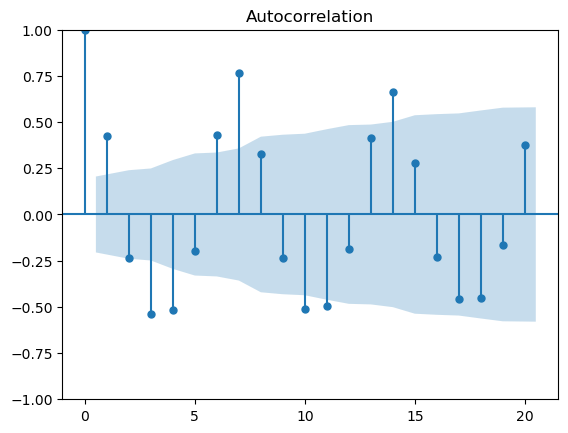

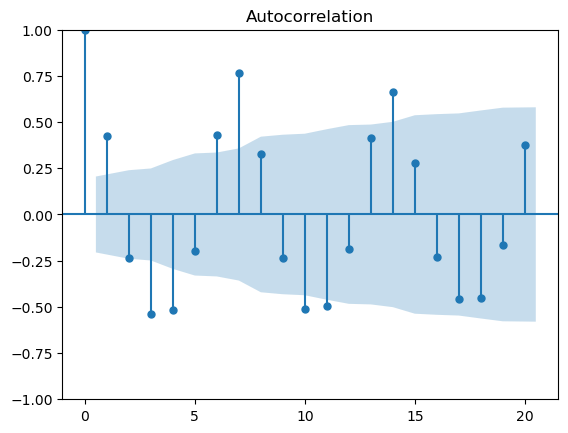

In [44]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2)

- The plot has the same pattern occuring over the time , hence it is stationary

##### ADfuller test to check the stationary of data 
We can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [46]:

from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(df['Number_Booked'])

# Print the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')


ADF Statistic: -9.06654222362849
p-value: 4.416995471162804e-15
Critical Values:
1%: -3.4323643041051666
5%: -2.862429999065346
10%: -2.5672437656428793


- Here the p-value is less than 0.05 the threshold value
- Hence the data points are stationary

##### Define the data to be used for training and testing

In [72]:
# Split the data
train_size = 0.8
train_index = int(len(df2) * train_size)
train_index


72

In [74]:
train_data = df2[:72]
test_data = df2[72:]

In [76]:
#Shape
print("Training Data:\n", train_data.shape)
print("\nTesting Data:\n", test_data.shape)


Training Data:
 (72, 1)

Testing Data:
 (19, 1)


In [80]:
# Display the split data
print("Training Data:\n", train_data.head())
print("\nTesting Data:\n", test_data.head())

Training Data:
                     Number_Booked
BookingEndDateTime               
2018-04-01                    223
2018-04-02                    296
2018-04-03                    957
2018-04-04                    905
2018-04-05                    695

Testing Data:
                     Number_Booked
BookingEndDateTime               
2018-06-12                    919
2018-06-13                    741
2018-06-14                    706
2018-06-15                    539
2018-06-16                    337


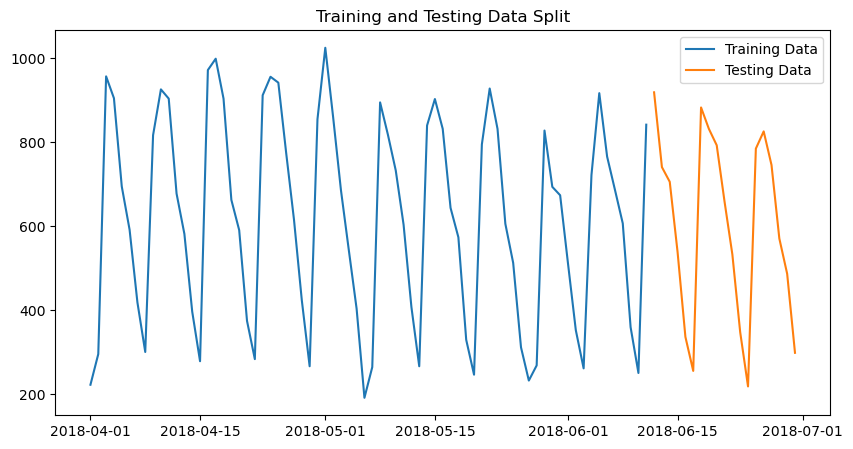

In [82]:
# Plot the training and testing data
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Number_Booked'], label='Training Data')
plt.plot(test_data.index, test_data['Number_Booked'], label='Testing Data')
plt.legend()
plt.title('Training and Testing Data Split')
plt.show()

#### AR model

In [132]:
from statsmodels.tsa.ar_model import AutoReg

In [138]:
# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(df2,maxlag=15,glob=True)
mod.ar_lags

[1, 7, 13]

In [142]:
## model creation
ar_model = AutoReg(train_data,lags=[1,7,13]) ## object creation with lags specified

ar_model_fit = ar_model.fit() #training the model

In [154]:
##making prediction
prediction = ar_model_fit.predict(start=72,end=91)

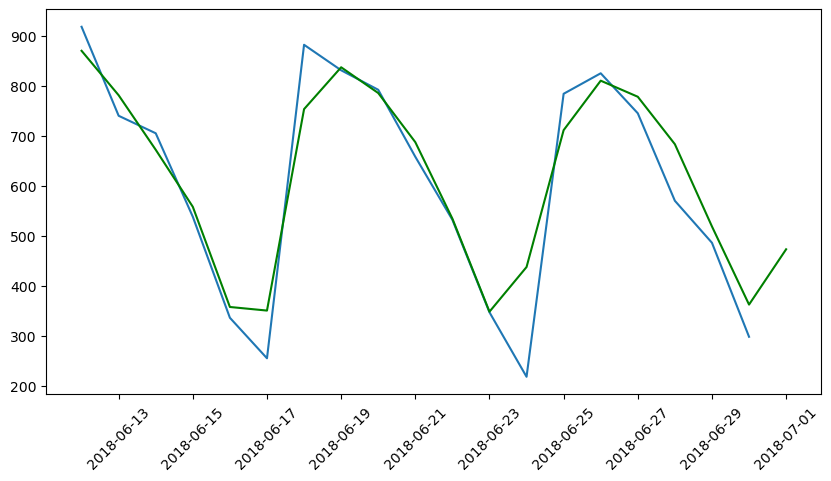

In [150]:
plt.figure(figsize=(10,5))
plt.plot(test_data)  #actual data
plt.plot(prediction,color='green') #graph of test vs prediction
plt.xticks(rotation=45)
plt.show()

In [156]:
##making prediction
prediction1 = ar_model_fit.predict(start=72,end=100)

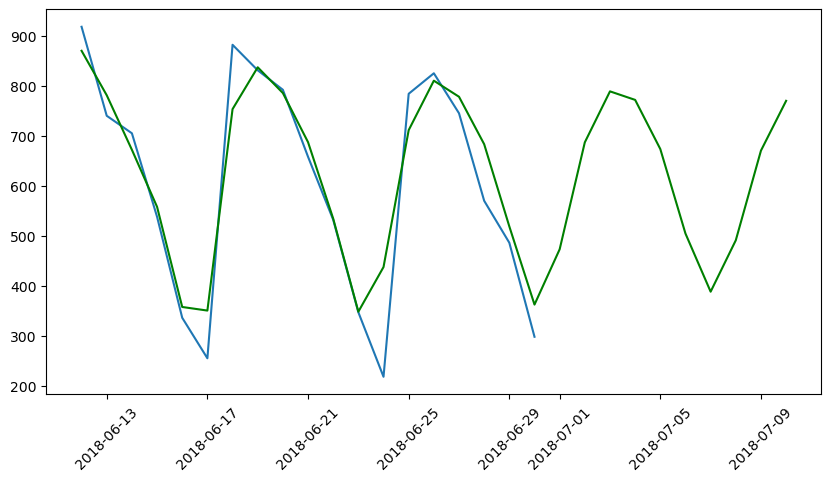

In [158]:
plt.figure(figsize=(10,5))
plt.plot(test_data)  #actual data
plt.plot(prediction1,color='green') #graph of test vs prediction
plt.xticks(rotation=45)
plt.show()

- Predictions are happening for future instances too

#### ARIMA

- Getting the optimal value of pdf values

In [84]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [88]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]  #i will be storing the pdq
list2=[]  # i will be stpring aic value

# it will be easy for me to compaare for which combo of pdf what aic is there

# later on i will go to list where i ahve aic score , get the mini aic

# which eveer combo is givng me the lower aic score that will eb taken as precise pdq value

for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train_data, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1003.9337039553975
(0, 0, 1) 981.7090633180999
(0, 0, 2) 982.1318943427963
(0, 0, 3) 974.0051477751214
(0, 0, 4) 972.9600142604388
(0, 1, 0) 996.4903375164922
(0, 1, 1) 997.2378930094507
(0, 1, 2) 972.7215554004782
(0, 1, 3) 972.6750708366785
(0, 1, 4) 964.908530360622
(0, 2, 0) 1022.4867248449269
(0, 2, 1) 989.5581245148297
(0, 2, 2) 990.0095090111784
(0, 2, 3) 970.0666473788064
(0, 2, 4) 969.4388910340286
(0, 3, 0) 1070.7220140278444
(0, 3, 1) 1013.6579845233118
(0, 3, 2) 985.4055380618576
(0, 3, 3) 985.4037455025134


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 3, 4) 969.1298172664285
(0, 4, 0) 1129.041495078153
(0, 4, 1) 1056.5562152336827
(0, 4, 2) 1004.1600218909784
(0, 4, 3) 982.3985243929471
(0, 4, 4) 980.8148695099558
(1, 0, 0) 991.2861754238711
(1, 0, 1) 983.1997915014572
(1, 0, 2) 980.625464358669


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 3) 974.0549736409437
(1, 0, 4) 976.9796456822843
(1, 1, 0) 997.8558042490579
(1, 1, 1) 981.8313429626222
(1, 1, 2) 973.9918057203781
(1, 1, 3) 973.6480027420669
(1, 1, 4) 963.93030582014
(1, 2, 0) 1018.6083915011513
(1, 2, 1) 990.719140836504
(1, 2, 2) 990.32998486133
(1, 2, 3) 991.9578154755951
(1, 2, 4) 972.9091690195056
(1, 3, 0) 1049.2057089174455
(1, 3, 1) 1010.3041442646306
(1, 3, 2) 1016.7116676297928
(1, 3, 3) 986.0830712567176
(1, 3, 4) 987.4534994309003
(1, 4, 0) 1089.5846470668434
(1, 4, 1) 1036.7398178023209
(1, 4, 2) 1004.0542554911117
(1, 4, 3) 1007.0565623931204


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 4, 4) 982.6344734287231
(2, 0, 0) 970.4942953552955
(2, 0, 1) 962.5459487694995
(2, 0, 2) 940.6103422747353
(2, 0, 3) 938.0305303518583


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 4) 939.5439190035528
(2, 1, 0) 993.272736224226
(2, 1, 1) 962.2885527981617
(2, 1, 2) 951.3421307212155
(2, 1, 3) 928.6374605270877


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 4) 938.4485557766341
(2, 2, 0) 1014.6658798411322
(2, 2, 1) 986.7645695341323
(2, 2, 2) 992.1417617924074
(2, 2, 3) 986.9099796420312
(2, 2, 4) 984.353383229494
(2, 3, 0) 1037.2187330887784
(2, 3, 1) 1006.9420497654473


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 2) 982.9180665321785


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3) 1002.4392339799945
(2, 3, 4) 985.5953775331374
(2, 4, 0) 1067.7841570452829
(2, 4, 1) 1025.6909706949496


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 4, 2) 999.6343505655343


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 4, 3) 1006.2159035470374


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 4, 4) 1003.0564085663547
(3, 0, 0) 965.8757053409847
(3, 0, 1) 963.2690195545022


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 2) 941.1735271525134
(3, 0, 3) 939.8753943595223


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 4) 943.6947514318288
(3, 1, 0) 989.6633064114741
(3, 1, 1) 958.1626244610068
(3, 1, 2) 956.1362393751493


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 3) 938.0997114876681


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 4) 941.8925506422055
(3, 2, 0) 1013.5510684564791
(3, 2, 1) 983.7608455447025


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 2) 956.570961992718
(3, 2, 3) 988.351446433056


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 4) 986.4075954105899
(3, 3, 0) 1030.7028802465618
(3, 3, 1) 1006.2562681361321
(3, 3, 2) 982.3831943323929


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3) 999.2321694944105


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 4) 1002.0386709863099
(3, 4, 0) 1046.073853524721
(3, 4, 1) 1019.9007218918099


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 2) 1000.0440973175921


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 3) 1013.9856284963595


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 4) 993.315102975912
(4, 0, 0) 959.0900446232395
(4, 0, 1) 960.5657170235274


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 2) 939.2638884194262


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 3) 941.917097500306


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 4) 925.0292979892085
(4, 1, 0) 979.5506483737512
(4, 1, 1) 948.7979992577722


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 2) 961.4604114181185


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 3) 930.6965268996315


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 4) 934.0435212745278
(4, 2, 0) 1013.2137099571896
(4, 2, 1) 974.4707351887814
(4, 2, 2) 985.0823718727531
(4, 2, 3) 987.5562927344076


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 4) 968.4257016934475
(4, 3, 0) 1032.4560226568533
(4, 3, 1) 1006.2766465242414
(4, 3, 2) 1008.0670433879737
(4, 3, 3) 1005.9170164428867


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 4) 1004.092576264106
(4, 4, 0) 1044.3451777985417


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 1) 1021.7541162292725
(4, 4, 2) 1021.3036158312848
(4, 4, 3) 1020.5004415717821
(4, 4, 4) 1023.978337518743


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
min(list2)  # lowest aic score

925.0292979892085

In [94]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
list1[loc]

(4, 0, 4)

In [96]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train_data, order=(4,0,4))

model_arima_fit = model_arima.fit() #training

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
forecast = model_arima_fit.forecast(steps=len(test_data))
forecast

2018-06-12    938.541834
2018-06-13    813.301619
2018-06-14    687.181626
2018-06-15    579.404809
2018-06-16    323.854007
2018-06-17    302.517531
2018-06-18    690.608718
2018-06-19    933.985567
2018-06-20    810.959313
2018-06-21    691.934669
2018-06-22    577.008025
2018-06-23    317.917086
2018-06-24    307.295128
2018-06-25    696.210206
2018-06-26    929.349932
2018-06-27    808.980280
2018-06-28    696.585848
2018-06-29    574.292070
2018-06-30    312.236319
Freq: D, Name: predicted_mean, dtype: float64

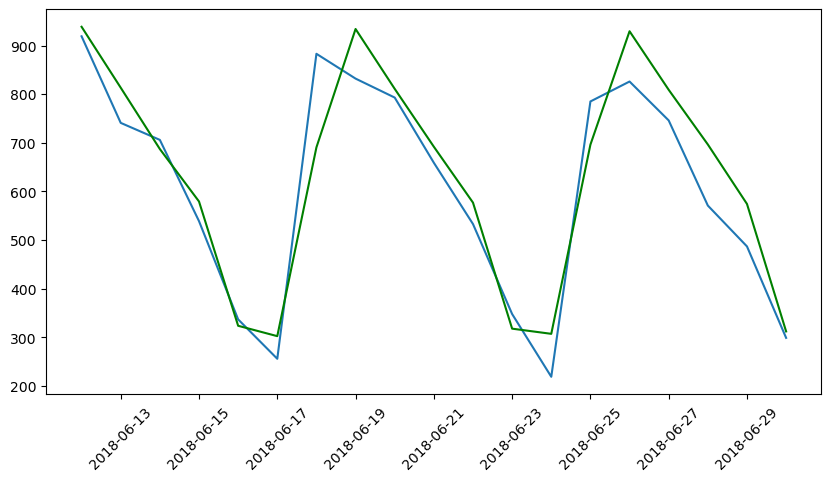

In [106]:
# Comparision of actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data)
plt.plot(forecast,color='green')#line plot for prediction
plt.xticks(rotation=45)
plt.show()

In [116]:
forecast1 = model_arima_fit.forecast(steps=25)
forecast1
# forcasting for future dates 

2018-06-12    938.541834
2018-06-13    813.301619
2018-06-14    687.181626
2018-06-15    579.404809
2018-06-16    323.854007
2018-06-17    302.517531
2018-06-18    690.608718
2018-06-19    933.985567
2018-06-20    810.959313
2018-06-21    691.934669
2018-06-22    577.008025
2018-06-23    317.917086
2018-06-24    307.295128
2018-06-25    696.210206
2018-06-26    929.349932
2018-06-27    808.980280
2018-06-28    696.585848
2018-06-29    574.292070
2018-06-30    312.236319
2018-07-01    312.287173
2018-07-02    701.468475
2018-07-03    924.656758
2018-07-04    807.356485
2018-07-05    701.117172
2018-07-06    571.273285
Freq: D, Name: predicted_mean, dtype: float64

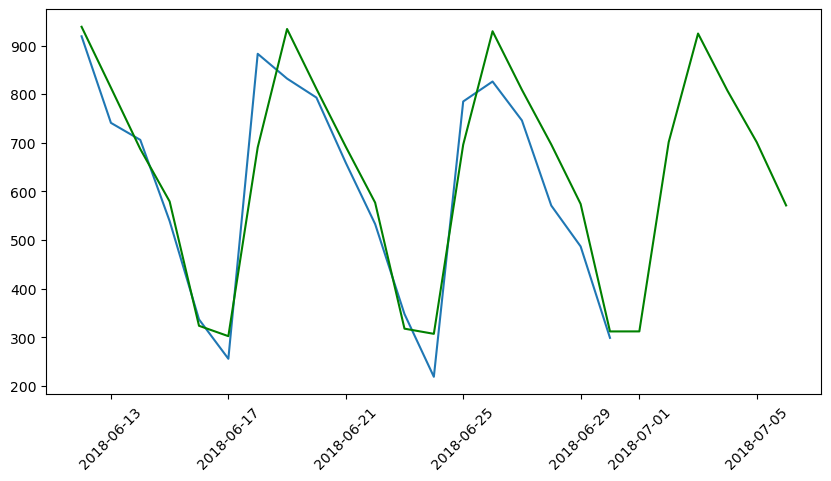

In [128]:
# Comparision of actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data)
plt.plot(forecast1,color='green')#line plot for prediction
plt.xticks(rotation=45)
plt.show()

- Model is able to predict the future instances too

####  Prophet

- Prophet is designed for time series forecasting and handles seasonal effects, holidays, and trend changes 


In [163]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 4.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/13.3 MB 4.9 MB/s eta 0:00:03
   - -------------------------------------- 0.7/13.3 MB 5.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/13.3 MB 5.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 5.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 5.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.3 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/13.3 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.3/13.3 MB 5.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/13.3 MB 4.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.7/13.3 MB 5.0 MB/s eta 0:00:03
   ---

##### Prepare Data
- Prophet expects a DataFrame with columns ds (datestamp) and y (value to forecast).

In [172]:
# the required data
df2.head()

,Number_Booked
BookingEndDateTime,
2018-04-01,223
2018-04-02,296
2018-04-03,957
2018-04-04,905
2018-04-05,695


In [174]:
# description of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2018-04-01 to 2018-06-30
Freq: D
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Number_Booked  91 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [177]:
train_data1 = df2[:72]
test_data1 = df2[72:]

In [179]:
# Prepare the data for prophet 
train_data_prophet = train_data1.reset_index().rename(columns={'BookingEndDateTime': 'ds', 'Number_Booked': 'y'})

In [183]:
# Initialize and fit the model
from prophet import Prophet

model = Prophet()
model.fit(train_data_prophet)

16:18:15 - cmdstanpy - INFO - Chain [1] start processing
16:18:16 - cmdstanpy - INFO - Chain [1] done processing


In [189]:
# Make future dataframe
future = model.make_future_dataframe(periods=len(test_data1))
forecast12 = model.predict(future)

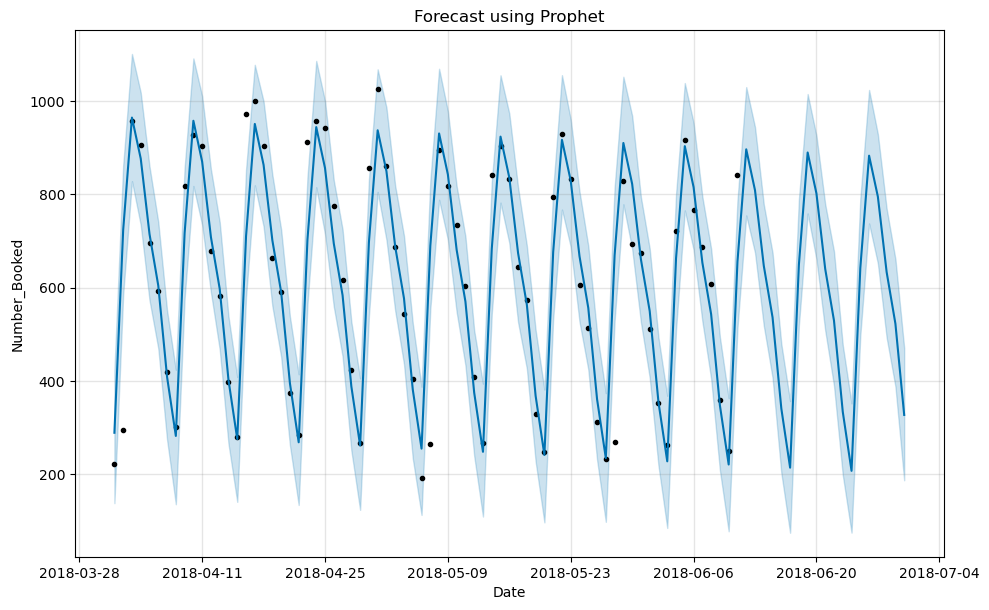

In [191]:
# Plot the forecast
fig = model.plot(forecast12)
plt.title('Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Number_Booked')
plt.show()

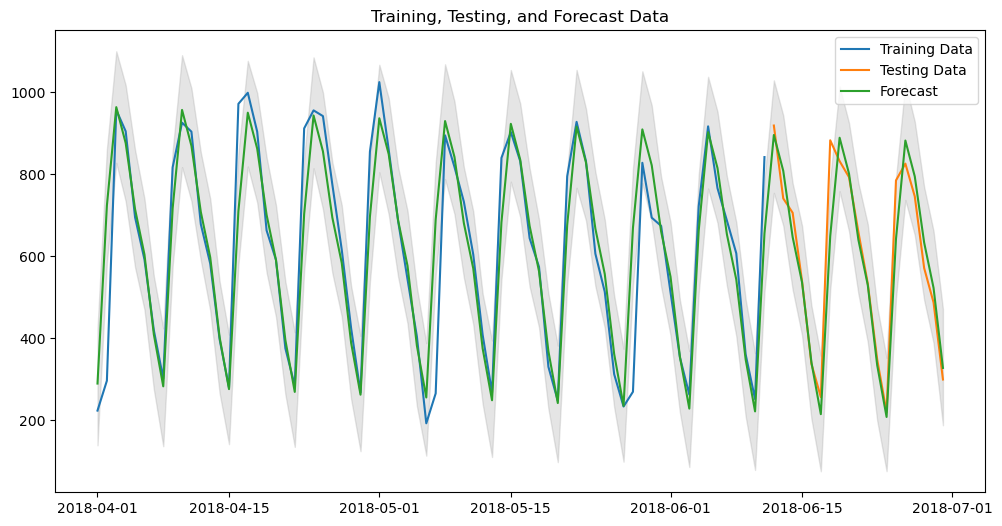

In [193]:
# Plot the training and testing data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data1.index, train_data1['Number_Booked'], label='Training Data')
plt.plot(test_data1.index, test_data1['Number_Booked'], label='Testing Data')
plt.plot(forecast['ds'], forecast12['yhat'], label='Forecast')
plt.fill_between(forecast12['ds'], forecast12['yhat_lower'], forecast12['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.title('Training, Testing, and Forecast Data')
plt.show()

#### Conclusion

- Comapred to AR , ARIMA , and Prophet
- Prophet is giving good result and can be taken for future prediction and reference
